# CW2: Hospital Readmission Prediction for Diabetic Patients


### Imports and setup


In [196]:
# Basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


In [197]:
# Using pip
%pip install seaborn --upgrade


Note: you may need to restart the kernel to use updated packages.


## Task 1: Dataset description


In [258]:
df = pd.read_csv("dataset_diabetes/diabetic_data.csv")
IDs_mapping = pd.read_csv("dataset_diabetes/IDs_mapping.csv")


In [259]:
df.head()


encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [260]:
IDs_mapping.head()


admission_type_id    description
0                 1      Emergency
1                 2         Urgent
2                 3       Elective
3                 4        Newborn
4                 5  Not Available

In [261]:
df.shape


(101766, 50)

In [262]:
df.columns = df.columns.str.upper()
IDs_mapping.columns = IDs_mapping.columns.str.upper()


In [263]:
print(f"df has {df.shape[1]} features and {df.shape[0]} samples")
print(f"The features are {df.columns}")


df has 50 features and 101766 samples
The features are Index(['ENCOUNTER_ID', 'PATIENT_NBR', 'RACE', 'GENDER', 'AGE', 'WEIGHT',
       'ADMISSION_TYPE_ID', 'DISCHARGE_DISPOSITION_ID', 'ADMISSION_SOURCE_ID',
       'TIME_IN_HOSPITAL', 'PAYER_CODE', 'MEDICAL_SPECIALTY',
       'NUM_LAB_PROCEDURES', 'NUM_PROCEDURES', 'NUM_MEDICATIONS',
       'NUMBER_OUTPATIENT', 'NUMBER_EMERGENCY', 'NUMBER_INPATIENT', 'DIAG_1',
       'DIAG_2', 'DIAG_3', 'NUMBER_DIAGNOSES', 'MAX_GLU_SERUM', 'A1CRESULT',
       'METFORMIN', 'REPAGLINIDE', 'NATEGLINIDE', 'CHLORPROPAMIDE',
       'GLIMEPIRIDE', 'ACETOHEXAMIDE', 'GLIPIZIDE', 'GLYBURIDE', 'TOLBUTAMIDE',
       'PIOGLITAZONE', 'ROSIGLITAZONE', 'ACARBOSE', 'MIGLITOL', 'TROGLITAZONE',
       'TOLAZAMIDE', 'EXAMIDE', 'CITOGLIPTON', 'INSULIN',
       'GLYBURIDE-METFORMIN', 'GLIPIZIDE-METFORMIN',
       'GLIMEPIRIDE-PIOGLITAZONE', 'METFORMIN-ROSIGLITAZONE',
       'METFORMIN-PIOGLITAZONE', 'CHANGE', 'DIABETESMED', 'READMITTED'],
      dtype='object')


In [264]:
df.columns[0]


'ENCOUNTER_ID'

In [265]:
# Single feature analysis -> latest studied
column = df.columns[49]  # set the column from its index

# Basic information
print(column)  # Print the column name
print(df[column].nunique())  # Number of unique values
print(df[column].unique())  # Values of the unique values

# Calculate the percentage of each unique value
value_counts = df[column].value_counts()
percentages = value_counts / len(df) * 100

# Create a new dataframe to store the results
table_data = {
    "Unique Value": value_counts.index,
    "Count": value_counts.values,
    "Percentage": percentages.values,
}
table_df = pd.DataFrame(table_data)

# Sort the dataframe by count in descending order
table_df = table_df.sort_values(by="Count", ascending=False)

table_df


READMITTED
3
['NO' '>30' '<30']


Unique Value  Count  Percentage
0           NO  54864   53.911916
1          >30  35545   34.928169
2          <30  11357   11.159916

In [205]:
df.describe()


ENCOUNTER_ID   PATIENT_NBR  ADMISSION_TYPE_ID  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       DISCHARGE_DISPOSITION_ID  ADMISSION_SOURCE_ID  TIME_IN_HOSPITAL  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       NUM_LAB_PROCEDURES  NUM_PROCEDURES  NUM_MEDICATIONS  NUMBER_OUTPATIENT  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       NUMBER_EMERGENCY  NUMBER_INPATIENT  NUMBER_DIAGNOSES  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [266]:
# df.isnull().sum()
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_data = pd.DataFrame(
    {"Missing Count": missing_count, "Missing Percentage": missing_percent}
)
missing_data


Missing Count  Missing Percentage
ENCOUNTER_ID                          0            0.000000
PATIENT_NBR                           0            0.000000
RACE                                  0            0.000000
GENDER                                0            0.000000
AGE                                   0            0.000000
WEIGHT                                0            0.000000
ADMISSION_TYPE_ID                     0            0.000000
DISCHARGE_DISPOSITION_ID              0            0.000000
ADMISSION_SOURCE_ID                   0            0.000000
TIME_IN_HOSPITAL                      0            0.000000
PAYER_CODE                            0            0.000000
MEDICAL_SPECIALTY                     0            0.000000
NUM_LAB_PROCEDURES                    0            0.000000
NUM_PROCEDURES                        0            0.000000
NUM_MEDICATIONS                       0            0.000000
NUMBER_OUTPATIENT                     0            0.000000
NUMBER_EMERGENCY                      0            0.000000
NUMBER_INPATIENT                      0            0.000000
DIAG_1                                0            0.000000
DIAG_2                                0            0.000000
DIAG_3                                0            0.000000
NUMBER_DIAGNOSES                      0            0.000000
MAX_GLU_SERUM                     96420           94.746772
A1CRESULT                         84748           83.277322
METFORMIN                             0            0.000000
REPAGLINIDE                           0            0.000000
NATEGLINIDE                           0            0.000000
CHLORPROPAMIDE                        0            0.000000
GLIMEPIRIDE                           0            0.000000
ACETOHEXAMIDE                         0            0.000000
GLIPIZIDE                             0            0.000000
GLYBURIDE                             0            0.000000
TOLBUTAMIDE                           0            0.000000
PIOGLITAZONE                          0            0.000000
ROSIGLITAZONE                         0            0.000000
ACARBOSE                              0            0.000000
MIGLITOL                              0            0.000000
TROGLITAZONE                          0            0.000000
TOLAZAMIDE                            0            0.000000
EXAMIDE                               0            0.000000
CITOGLIPTON                           0            0.000000
INSULIN                               0            0.000000
GLYBURIDE-METFORMIN                   0            0.000000
GLIPIZIDE-METFORMIN                   0            0.000000
GLIMEPIRIDE-PIOGLITAZONE              0            0.000000
METFORMIN-ROSIGLITAZONE               0            0.000000
METFORMIN-PIOGLITAZONE                0            0.000000
CHANGE                                0            0.000000
DIABETESMED                           0            0.000000
READMITTED                            0            0.000000

In [257]:
for col in df.columns:
    if df[col].dtype == object:
        missing_count = df[col][
            df[col] == "?"
        ].count()  # According to the metadata, more unknown values than NaN values: unknown are specified by"?
        missing_percent = (missing_count / len(df)) * 100
        print(
            f"{col}: {missing_count} , {missing_percent:.2f}"
        )  # Assessing how important the missing data is


RACE: 2273 , 2.23
GENDER: 0 , 0.00
AGE: 0 , 0.00
WEIGHT: 98569 , 96.86
PAYER_CODE: 40256 , 39.56
MEDICAL_SPECIALTY: 49949 , 49.08
DIAG_1: 21 , 0.02
DIAG_2: 358 , 0.35
DIAG_3: 1423 , 1.40
MAX_GLU_SERUM: 0 , 0.00
A1CRESULT: 0 , 0.00
METFORMIN: 0 , 0.00
REPAGLINIDE: 0 , 0.00
NATEGLINIDE: 0 , 0.00
CHLORPROPAMIDE: 0 , 0.00
GLIMEPIRIDE: 0 , 0.00
ACETOHEXAMIDE: 0 , 0.00
GLIPIZIDE: 0 , 0.00
GLYBURIDE: 0 , 0.00
TOLBUTAMIDE: 0 , 0.00
PIOGLITAZONE: 0 , 0.00
ROSIGLITAZONE: 0 , 0.00
ACARBOSE: 0 , 0.00
MIGLITOL: 0 , 0.00
TROGLITAZONE: 0 , 0.00
TOLAZAMIDE: 0 , 0.00
EXAMIDE: 0 , 0.00
CITOGLIPTON: 0 , 0.00
INSULIN: 0 , 0.00
GLYBURIDE-METFORMIN: 0 , 0.00
GLIPIZIDE-METFORMIN: 0 , 0.00
GLIMEPIRIDE-PIOGLITAZONE: 0 , 0.00
METFORMIN-ROSIGLITAZONE: 0 , 0.00
METFORMIN-PIOGLITAZONE: 0 , 0.00
CHANGE: 0 , 0.00
DIABETESMED: 0 , 0.00


In [268]:
# Dropping empty columns
df = df.drop(
    ["MAX_GLU_SERUM", "A1CRESULT", "WEIGHT", "PAYER_CODE", "MEDICAL_SPECIALTY"], axis=1
)


In [269]:
df.info()  # objecttype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ENCOUNTER_ID              101766 non-null  int64 
 1   PATIENT_NBR               101766 non-null  int64 
 2   RACE                      101766 non-null  object
 3   GENDER                    101766 non-null  object
 4   AGE                       101766 non-null  object
 5   ADMISSION_TYPE_ID         101766 non-null  int64 
 6   DISCHARGE_DISPOSITION_ID  101766 non-null  int64 
 7   ADMISSION_SOURCE_ID       101766 non-null  int64 
 8   TIME_IN_HOSPITAL          101766 non-null  int64 
 9   NUM_LAB_PROCEDURES        101766 non-null  int64 
 10  NUM_PROCEDURES            101766 non-null  int64 
 11  NUM_MEDICATIONS           101766 non-null  int64 
 12  NUMBER_OUTPATIENT         101766 non-null  int64 
 13  NUMBER_EMERGENCY          101766 non-null  int64 
 14  NUMB

In [271]:
# Unique values per feature
for i in list(df.columns):
    print(
        "Number of Unique values in {} :  {} ".format(i, df[i].value_counts().shape[0])
    )


Number of Unique values in ENCOUNTER_ID :  101766 
Number of Unique values in PATIENT_NBR :  71518 
Number of Unique values in RACE :  6 
Number of Unique values in GENDER :  3 
Number of Unique values in AGE :  10 
Number of Unique values in ADMISSION_TYPE_ID :  8 
Number of Unique values in DISCHARGE_DISPOSITION_ID :  26 
Number of Unique values in ADMISSION_SOURCE_ID :  17 
Number of Unique values in TIME_IN_HOSPITAL :  14 
Number of Unique values in NUM_LAB_PROCEDURES :  118 
Number of Unique values in NUM_PROCEDURES :  7 
Number of Unique values in NUM_MEDICATIONS :  75 
Number of Unique values in NUMBER_OUTPATIENT :  39 
Number of Unique values in NUMBER_EMERGENCY :  33 
Number of Unique values in NUMBER_INPATIENT :  21 
Number of Unique values in DIAG_1 :  717 
Number of Unique values in DIAG_2 :  749 
Number of Unique values in DIAG_3 :  790 
Number of Unique values in NUMBER_DIAGNOSES :  16 
Number of Unique values in METFORMIN :  4 
Number of Unique values in REPAGLINIDE :  4

In [278]:
# Dropping the columns with unique values
df.drop(["EXAMIDE", "CITOGLIPTON"], axis=1, inplace=True)


In [279]:
df["GENDER"].unique()


array(['Female', 'Male'], dtype=object)

In [280]:
count_unknown_gender = df[df["GENDER"] == "Unknown/Invalid"].shape[0]
print(count_unknown_gender)


0


In [281]:
unknown_gender_patients = df[df["GENDER"] == "Unknown/Invalid"]["PATIENT_NBR"]
multiple_unknown_gender_patients = unknown_gender_patients[
    unknown_gender_patients.duplicated()
]
multiple_unknown_gender_patients


Series([], Name: PATIENT_NBR, dtype: int64)

In [277]:
df = df[df["GENDER"] != "Unknown/Invalid"]


In [284]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    ------
        dataframe: dataframe

        cat_th: int, optional

        car_th: int, optional
    Returns
    ------
        cat_cols: list
                Categorical features
        num_cols: list
                Numerical features
        cat_but_car: list
               Categorical view cardinal variable list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [
        col
        for col in dataframe.columns
        if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"
    ]
    cat_but_car = [
        col
        for col in dataframe.columns
        if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"
    ]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    # print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 101763
Variables: 43
cat_cols: 29
num_cols: 11
cat_but_car: 3


In [285]:
print("cat_cols:", len(cat_cols), cat_cols)
print("num_cols:", len(num_cols), num_cols)
print("cat_but_car:", len(cat_but_car), cat_but_car)


cat_cols: 29 ['RACE', 'GENDER', 'AGE', 'METFORMIN', 'REPAGLINIDE', 'NATEGLINIDE', 'CHLORPROPAMIDE', 'GLIMEPIRIDE', 'ACETOHEXAMIDE', 'GLIPIZIDE', 'GLYBURIDE', 'TOLBUTAMIDE', 'PIOGLITAZONE', 'ROSIGLITAZONE', 'ACARBOSE', 'MIGLITOL', 'TROGLITAZONE', 'TOLAZAMIDE', 'INSULIN', 'GLYBURIDE-METFORMIN', 'GLIPIZIDE-METFORMIN', 'GLIMEPIRIDE-PIOGLITAZONE', 'METFORMIN-ROSIGLITAZONE', 'METFORMIN-PIOGLITAZONE', 'CHANGE', 'DIABETESMED', 'READMITTED', 'ADMISSION_TYPE_ID', 'NUM_PROCEDURES']
num_cols: 11 ['ENCOUNTER_ID', 'PATIENT_NBR', 'DISCHARGE_DISPOSITION_ID', 'ADMISSION_SOURCE_ID', 'TIME_IN_HOSPITAL', 'NUM_LAB_PROCEDURES', 'NUM_MEDICATIONS', 'NUMBER_OUTPATIENT', 'NUMBER_EMERGENCY', 'NUMBER_INPATIENT', 'NUMBER_DIAGNOSES']
cat_but_car: 3 ['DIAG_1', 'DIAG_2', 'DIAG_3']


### Target encoding


In [212]:
target = "READMITTED"


In [286]:
unique_values = df[target].unique()
print(unique_values)
value_counts = df[target].value_counts()
print(value_counts)


['NO' '>30' '<30']
READMITTED
NO     54861
>30    35545
<30    11357
Name: count, dtype: int64


In [287]:
# Target encoding -> Binary classification
df["READMITTED"] = df["READMITTED"].apply(lambda x: 0 if x == "NO" else 1)


In [288]:
unique_values = df["READMITTED"].unique()
print(unique_values)
value_counts = df["READMITTED"].value_counts()
print(value_counts)


[0 1]
READMITTED
0    54861
1    46902
Name: count, dtype: int64


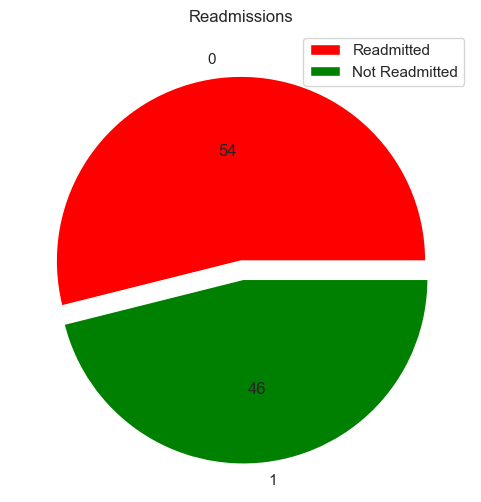

In [292]:
labels = df[target].unique()
count = df[target].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    count,
    labels=labels,
    autopct="%.0f",
    explode=(0, 0.1),
    colors=["red", "green"],
)
plt.legend(["Readmitted", "Not Readmitted"], loc=1)

plt.title("Readmissions")
plt.show()


In [318]:
duplicate_patients = df[df.duplicated(subset="PATIENT_NBR", keep=False)]
count_duplicate_patients = duplicate_patients["PATIENT_NBR"].nunique()
percent_duplicate_patients = count_duplicate_patients / df["PATIENT_NBR"].nunique()
print(f"The number of patients with duplicate entries is: {count_duplicate_patients}")
print(
    f"The percent of patients with duplicate entries is: {percent_duplicate_patients}"
)


The number of patients with duplicate entries is: 16752
The percent of patients with duplicate entries is: 0.23447735289177538


In [319]:
df_simplified = df.groupby("PATIENT_NBR").head(2)


In [321]:
df_simplified.shape


(88196, 43)

In [324]:
unique_values = df_simplified["READMITTED"].unique()
print(unique_values)
value_counts = df_simplified["READMITTED"].value_counts()
print(value_counts)


[0 1]
READMITTED
0    50532
1    37664
Name: count, dtype: int64


In [323]:
duplicate_patients = df_simplified[
    df_simplified.duplicated(subset="PATIENT_NBR", keep=False)
]
count_duplicate_patients = duplicate_patients["PATIENT_NBR"].nunique()
percent_duplicate_patients = (
    count_duplicate_patients / df_simplified["PATIENT_NBR"].nunique()
)
print(f"The number of patients with duplicate entries is: {count_duplicate_patients}")
print(
    f"The percent of patients with duplicate entries is: {percent_duplicate_patients}"
)


The number of patients with duplicate entries is: 16752
The percent of patients with duplicate entries is: 0.23447735289177538


### 1. Numerical columns


In [216]:
df_num = df[num_cols]


In [217]:
df_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   ENCOUNTER_ID              101766 non-null  int64
 1   PATIENT_NBR               101766 non-null  int64
 2   DISCHARGE_DISPOSITION_ID  101766 non-null  int64
 3   ADMISSION_SOURCE_ID       101766 non-null  int64
 4   TIME_IN_HOSPITAL          101766 non-null  int64
 5   NUM_LAB_PROCEDURES        101766 non-null  int64
 6   NUM_MEDICATIONS           101766 non-null  int64
 7   NUMBER_OUTPATIENT         101766 non-null  int64
 8   NUMBER_EMERGENCY          101766 non-null  int64
 9   NUMBER_INPATIENT          101766 non-null  int64
 10  NUMBER_DIAGNOSES          101766 non-null  int64
dtypes: int64(11)
memory usage: 8.5 MB


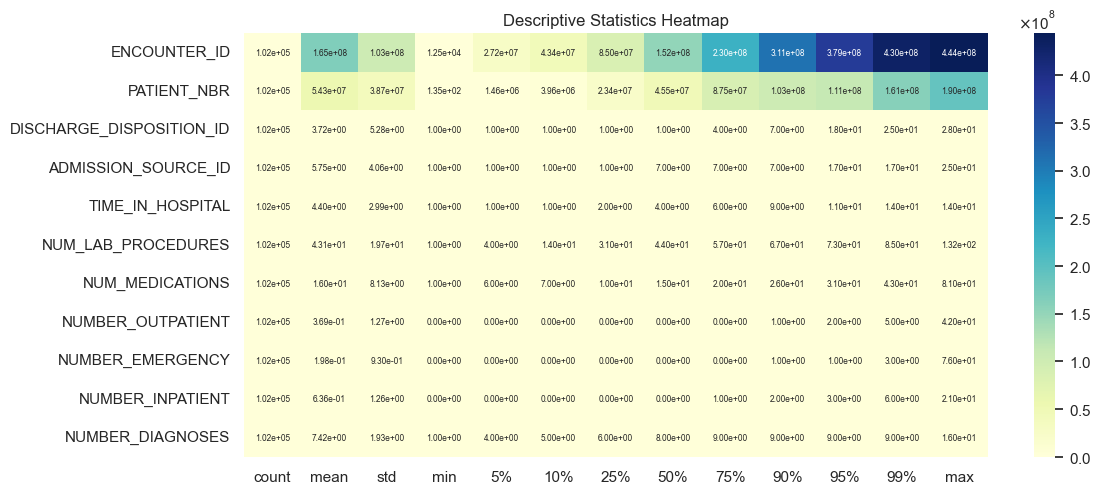

In [218]:
# Statistical heatmap

import matplotlib.ticker as ticker

# Specified quantiles
quantiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]

# Calculating descriptive statistics for each numerical column at the specified quantiles
stats_df = df_num.describe(quantiles).T

# Creating the heatmap
plt.figure(figsize=(12, len(num_cols) * 0.5))  # Adjust figure size as needed
sns.heatmap(stats_df, annot=True, cmap="YlGnBu", fmt=".2e", annot_kws={"size": 6})

# Format the tick labels on the colorbar
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(formatter)

plt.title("Descriptive Statistics Heatmap")
plt.show()


/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_12698/1285427232.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_num.hist(bins=20, ax=ax[0])


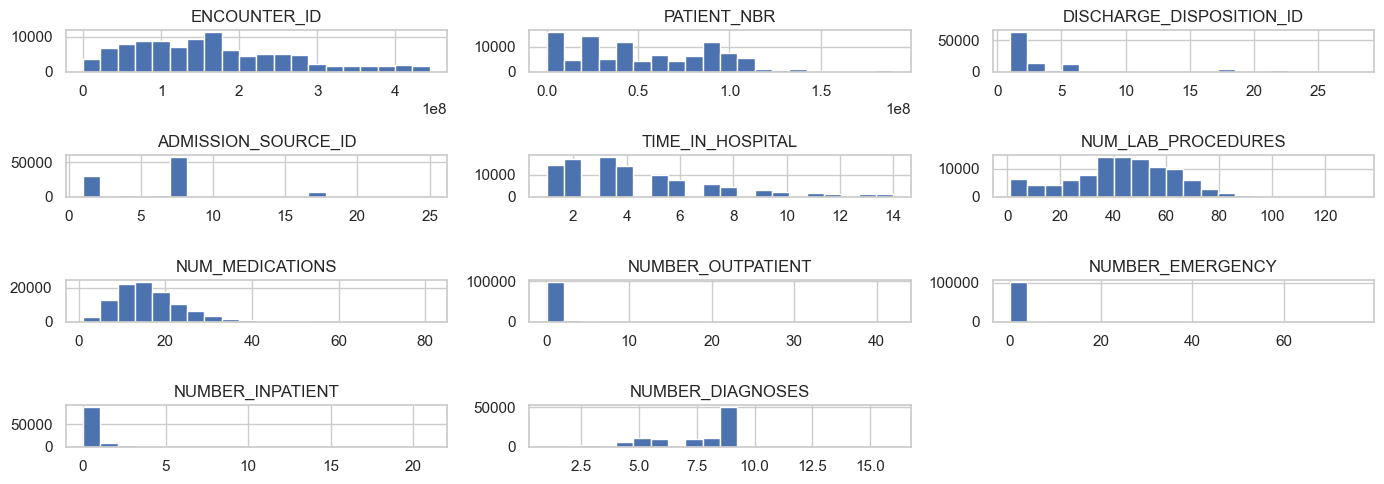

In [219]:
# Normal histograms for all numerical values

fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns for two subplots
df_num.hist(bins=20, ax=ax[0])
ax[0].set_xlabel(num_cols)
ax[0].set_title(num_cols)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

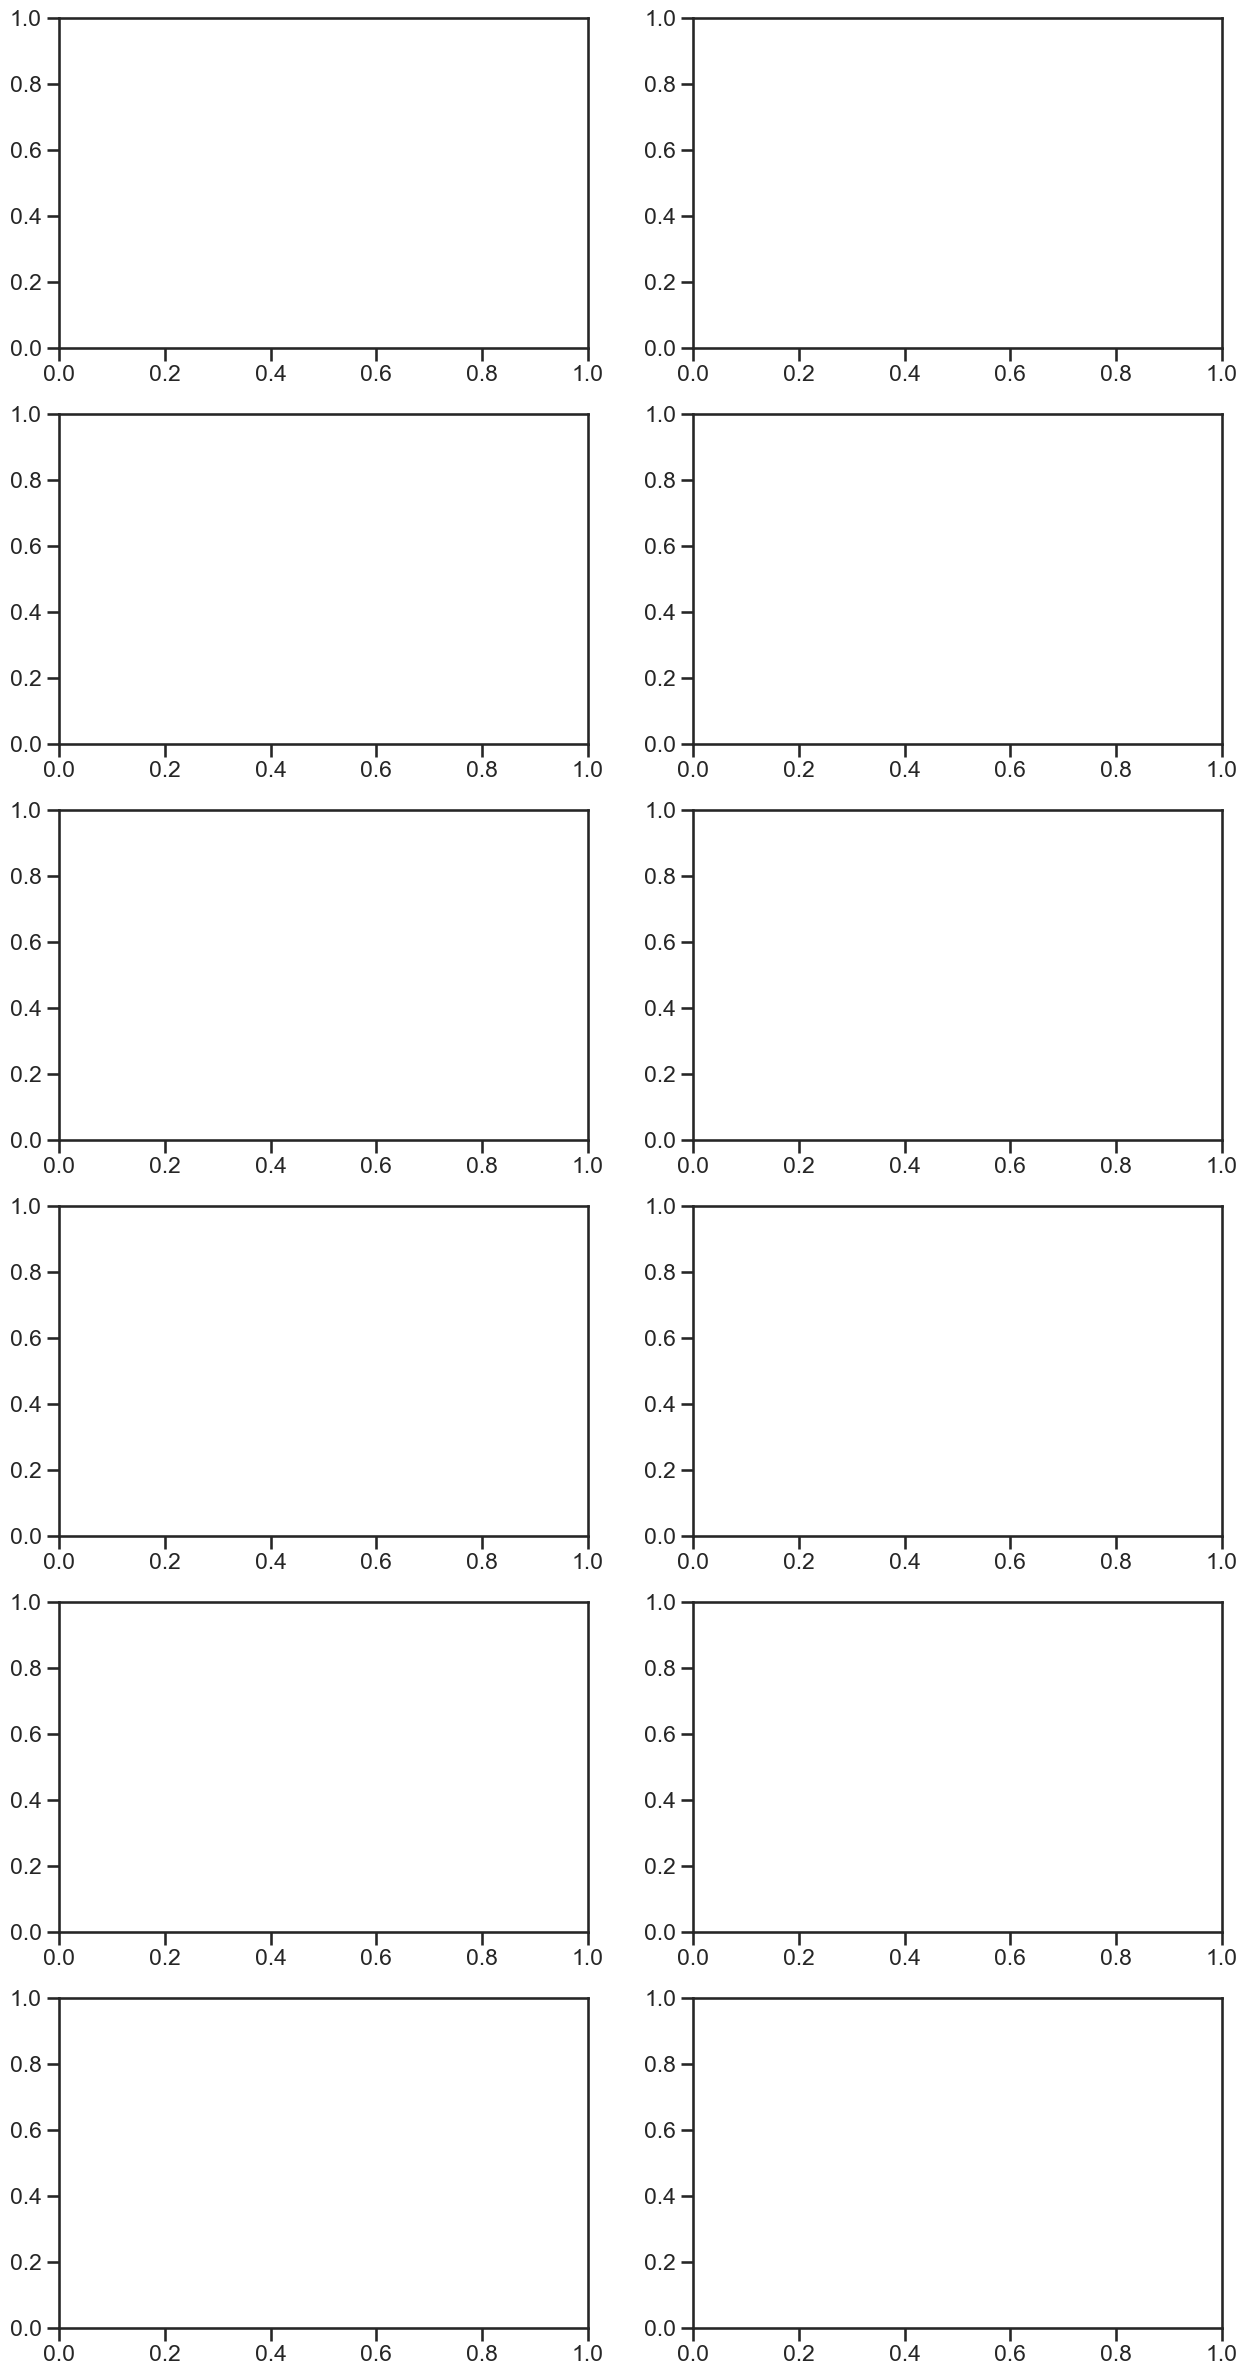

In [238]:
# Hued histogram

# Create subplots for each numerical column
# fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, 5 * len(num_cols)))

# # Iterate over each numerical column and plot the histogram hued on "READMITTED"
# for i, col in enumerate(num_cols):
#     sns.histplot(data=df, x=col, hue="READMITTED", ax=axes[i], multiple="stack", kde=True)

#     # Set the title and labels for each subplot
#     axes[i].set_title(f"Histogram of {col} hued on 'READMITTED'")
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel("Count")

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()


# Create subplots for each numerical column
fig, axes = plt.subplots(len(num_cols) // 2, 2, figsize=(15, 5 * (len(num_cols) // 2)))

# Iterate over each numerical column and plot the histogram hued on "READMITTED"
for i, col in enumerate(num_cols):
    row = i // 2
    col = i % 2
    sns.histplot(
        data=df, x=col, hue="READMITTED", ax=axes[row, col], multiple="stack", kde=True
    )

    # Set the title and labels for each subplot
    axes[row, col].set_title(f"Histogram of {col} hued on 'READMITTED'")
    axes[row, col].set_xlabel(col)
    axes[row, col].set_ylabel("Count")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Histogram with distribution


ValueError: num must be an integer with 1 <= num <= 9, not 10

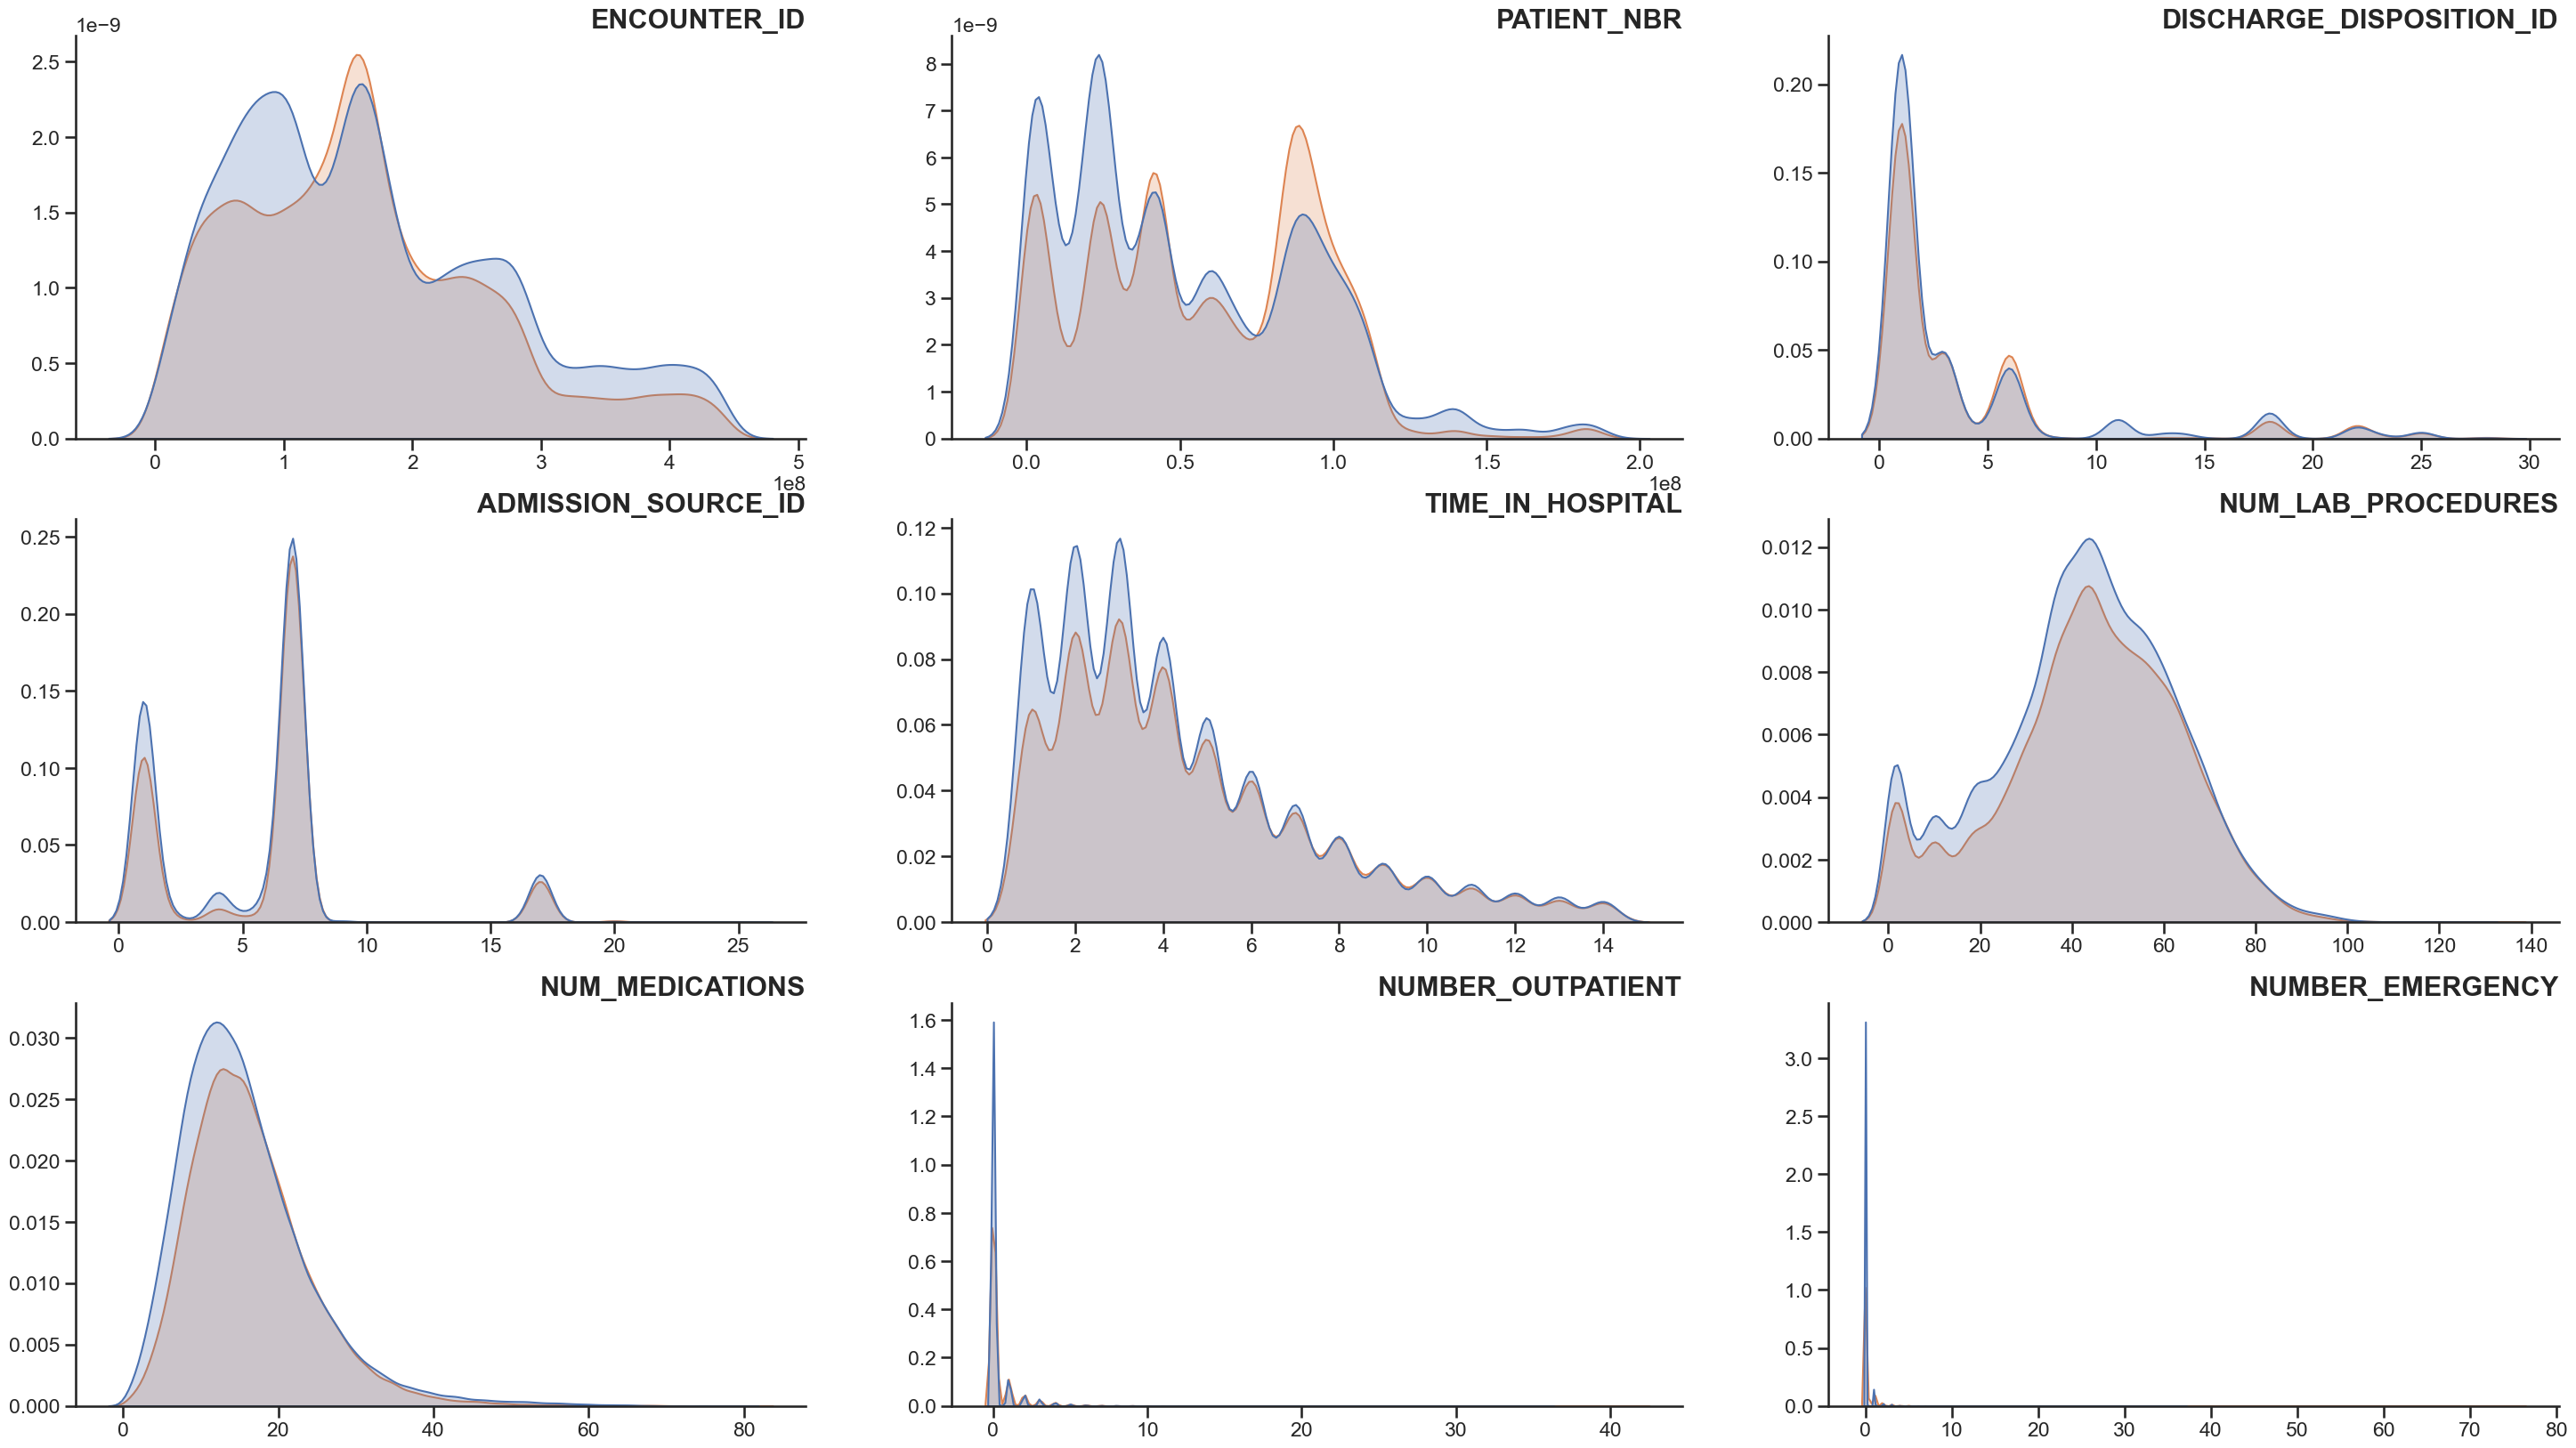

In [235]:
# KDE Plot - Target hued
figsize = (6 * 6, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(df[num_cols].columns[:-1]):
    ax = plt.subplot(3, 3, idx + 1)
    sns.kdeplot(data=df, hue="READMITTED", fill=True, x=col, legend=False)
    ax.set_ylabel("")
    ax.spines["top"].set_visible(False),
    ax.set_xlabel("")
    ax.spines["right"].set_visible(False)
    ax.set_title(f"{col}", loc="right", weight="bold", fontsize=22)

fig.suptitle(f"Features vs Target\n\n\n", ha="center", fontweight="bold", fontsize=25)
fig.legend(
    ["readmitted", "not readmitted"],
    loc="upper center",
    bbox_to_anchor=(0.5, 0.96),
    fontsize=21,
    ncol=3,
)
plt.tight_layout()
plt.show()


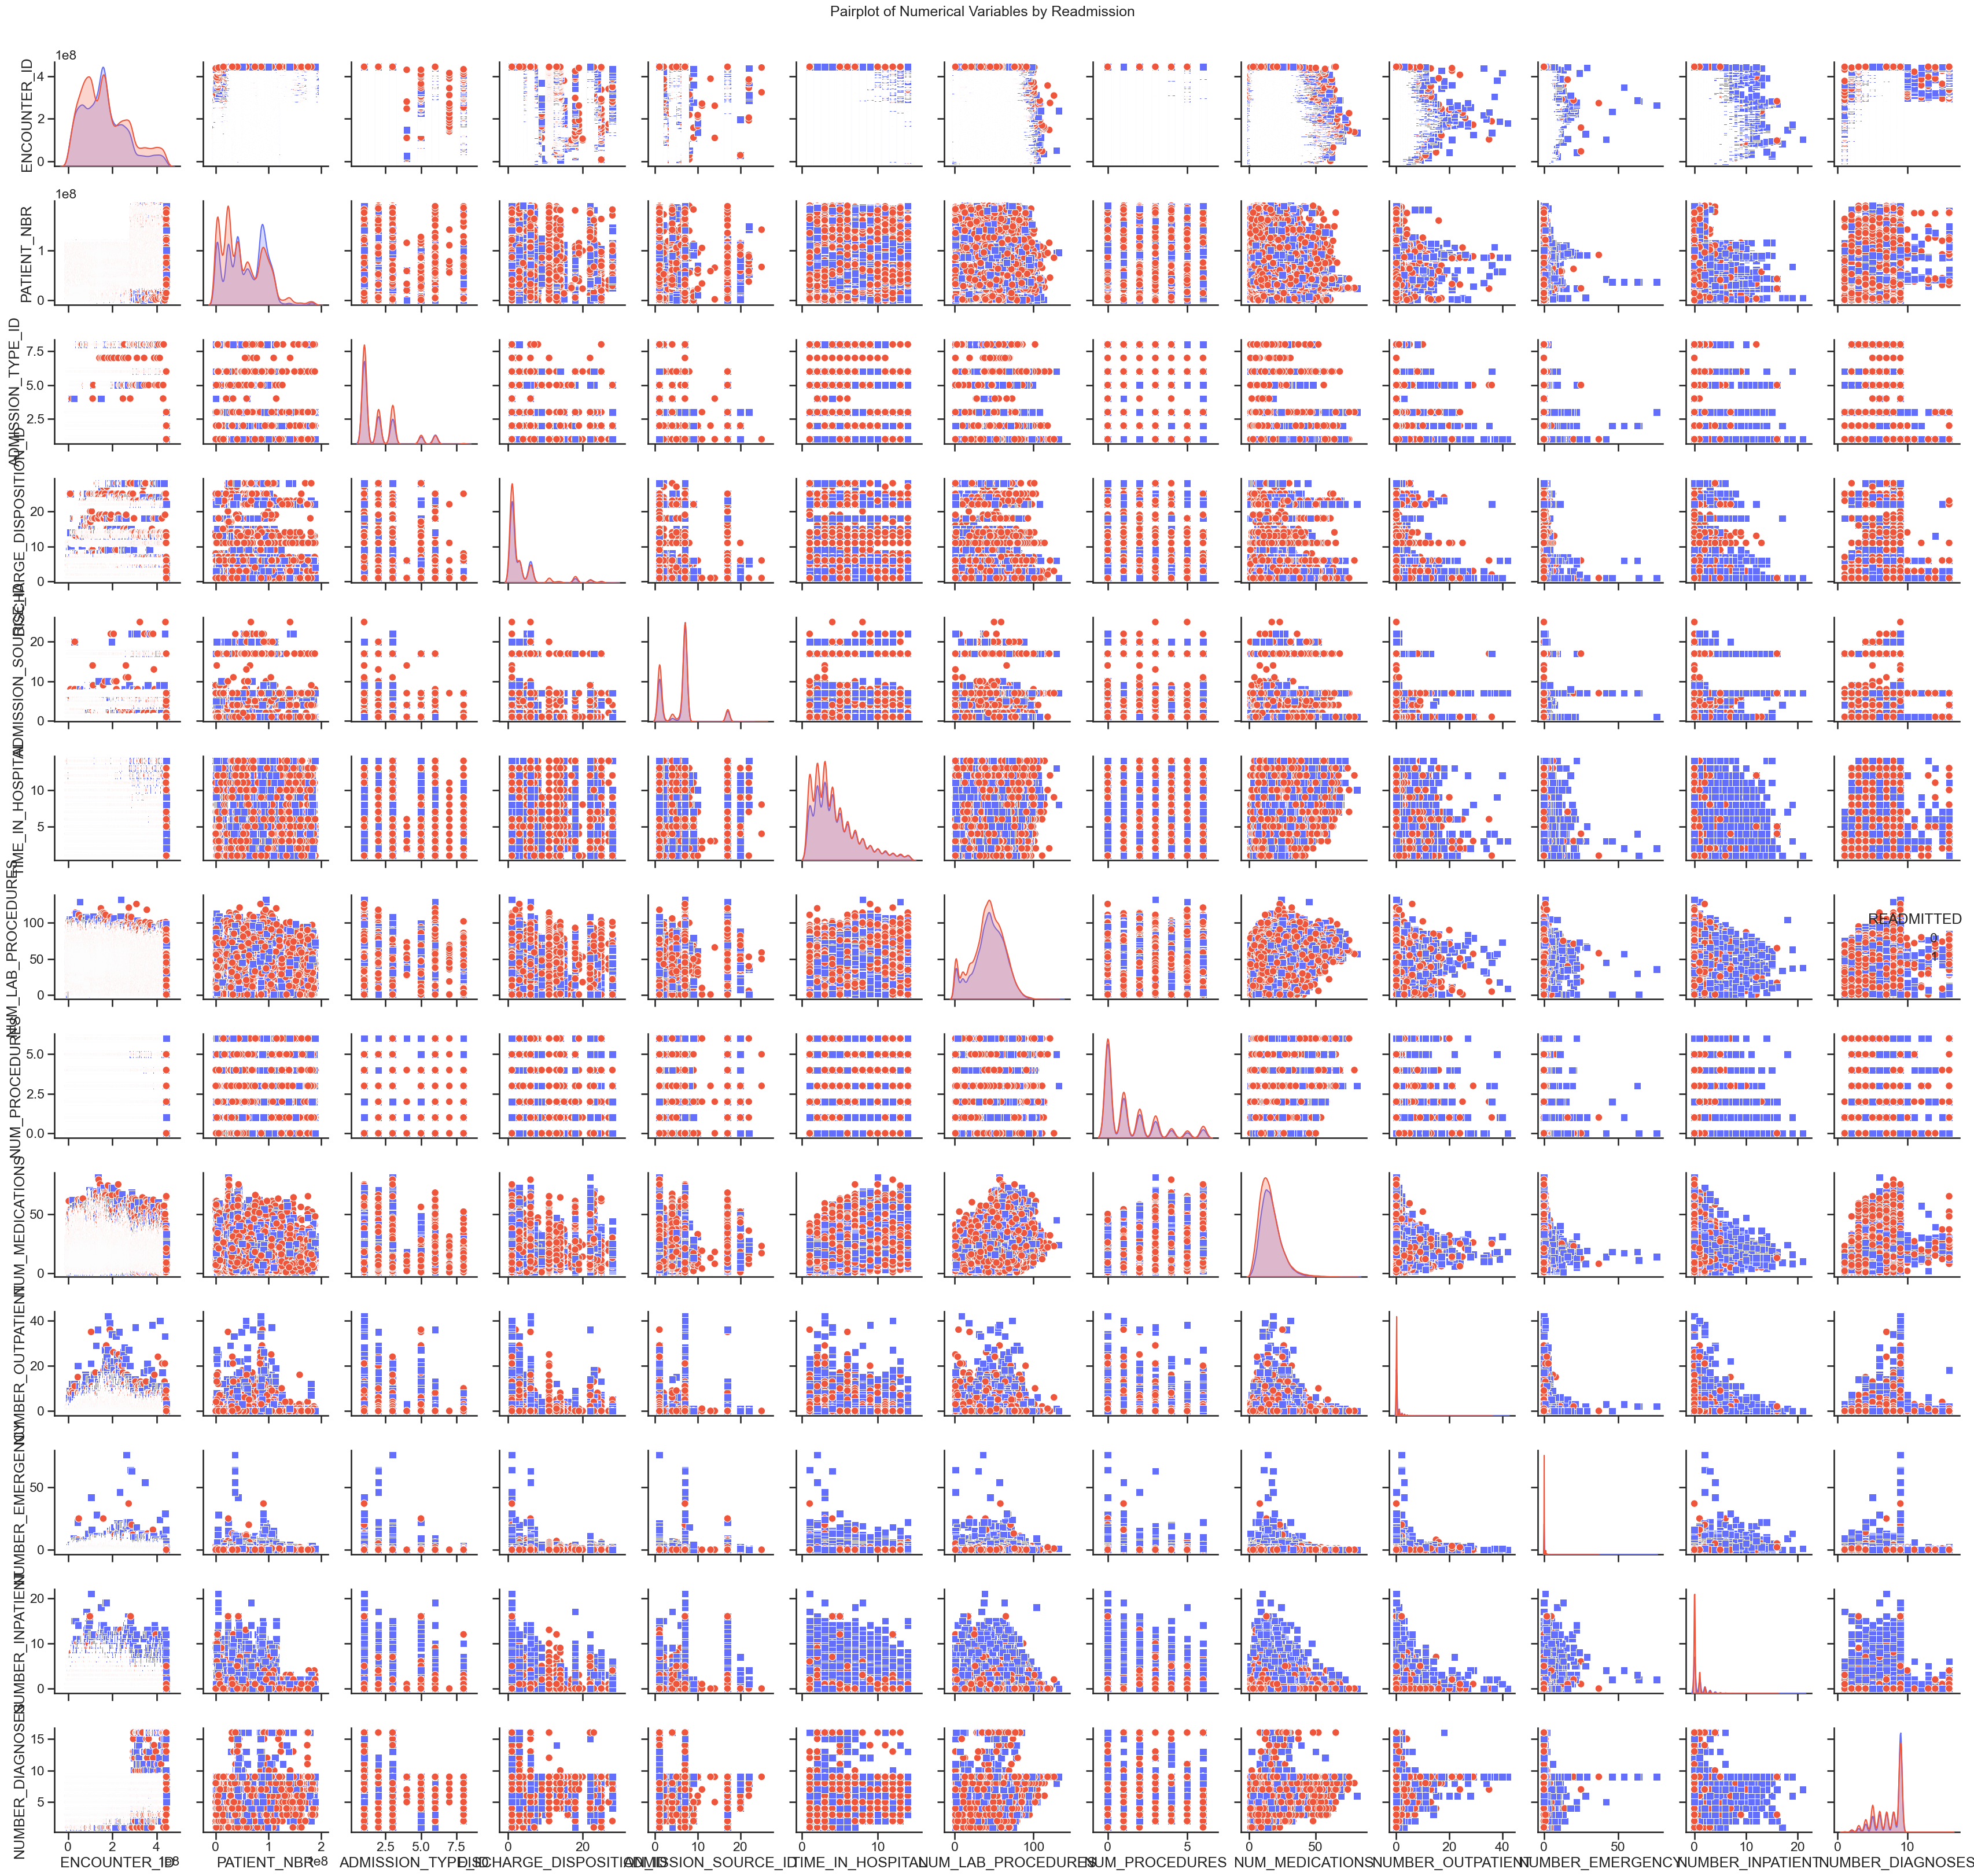

In [225]:
# Pairplot
sns.set(style="ticks")
sns.set_context("talk")
pairplot = sns.pairplot(data=df, hue="READMITTED", palette=color, markers=["o", "s"])
plt.subplots_adjust(top=1)
pairplot.fig.suptitle(
    "Pairplot of Numerical Variables by Readmission", fontsize=18, y=1
)
plt.tight_layout()
plt.show()


In [326]:
num_cols.append("READMITTED")


<Axes: >

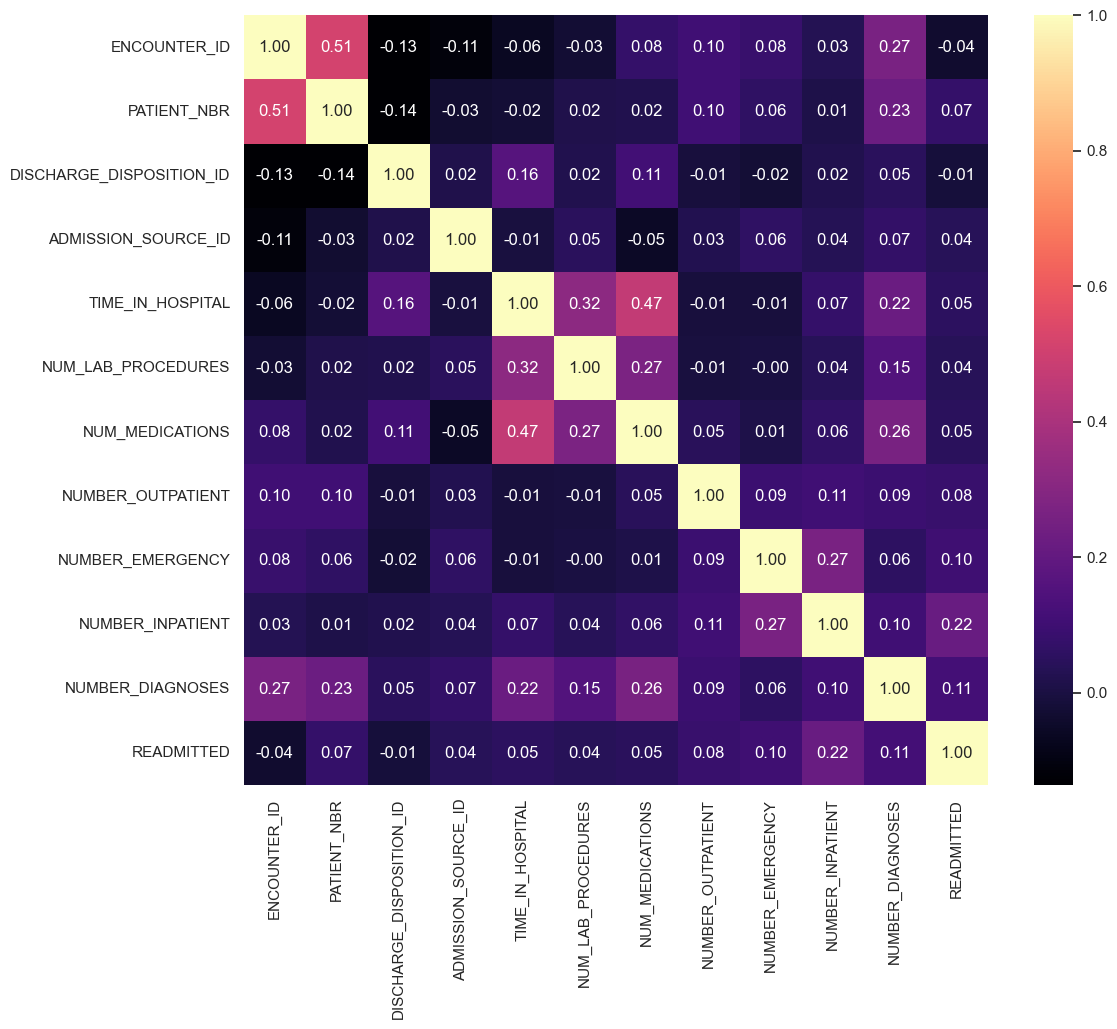

In [327]:
# CORRELATION MATRIX
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="magma", fmt=".2f")


### 2. Categorical columns


In [296]:
print(cat_cols)


NUM_PROCEDURES


In [297]:
medications = [
    "ACARBOSE",
    "ACETOHEXAMIDE",
    "CHLORPROPAMIDE",
    "GLIMEPIRIDE",
    "GLIMEPIRIDE-PIOGLITAZONE",
    "GLIPIZIDE",
    "GLIPIZIDE-METFORMIN",
    "GLYBURIDE",
    "GLYBURIDE-METFORMIN",
    "INSULIN",
    "METFORMIN",
    "METFORMIN-PIOGLITAZONE",
    "METFORMIN-ROSIGLITAZONE",
    "MIGLITOL",
    "NATEGLINIDE",
    "PIOGLITAZONE",
    "REPAGLINIDE",
    "ROSIGLITAZONE",
    "TOLAZAMIDE",
    "TOLBUTAMIDE",
    "TROGLITAZONE",
]


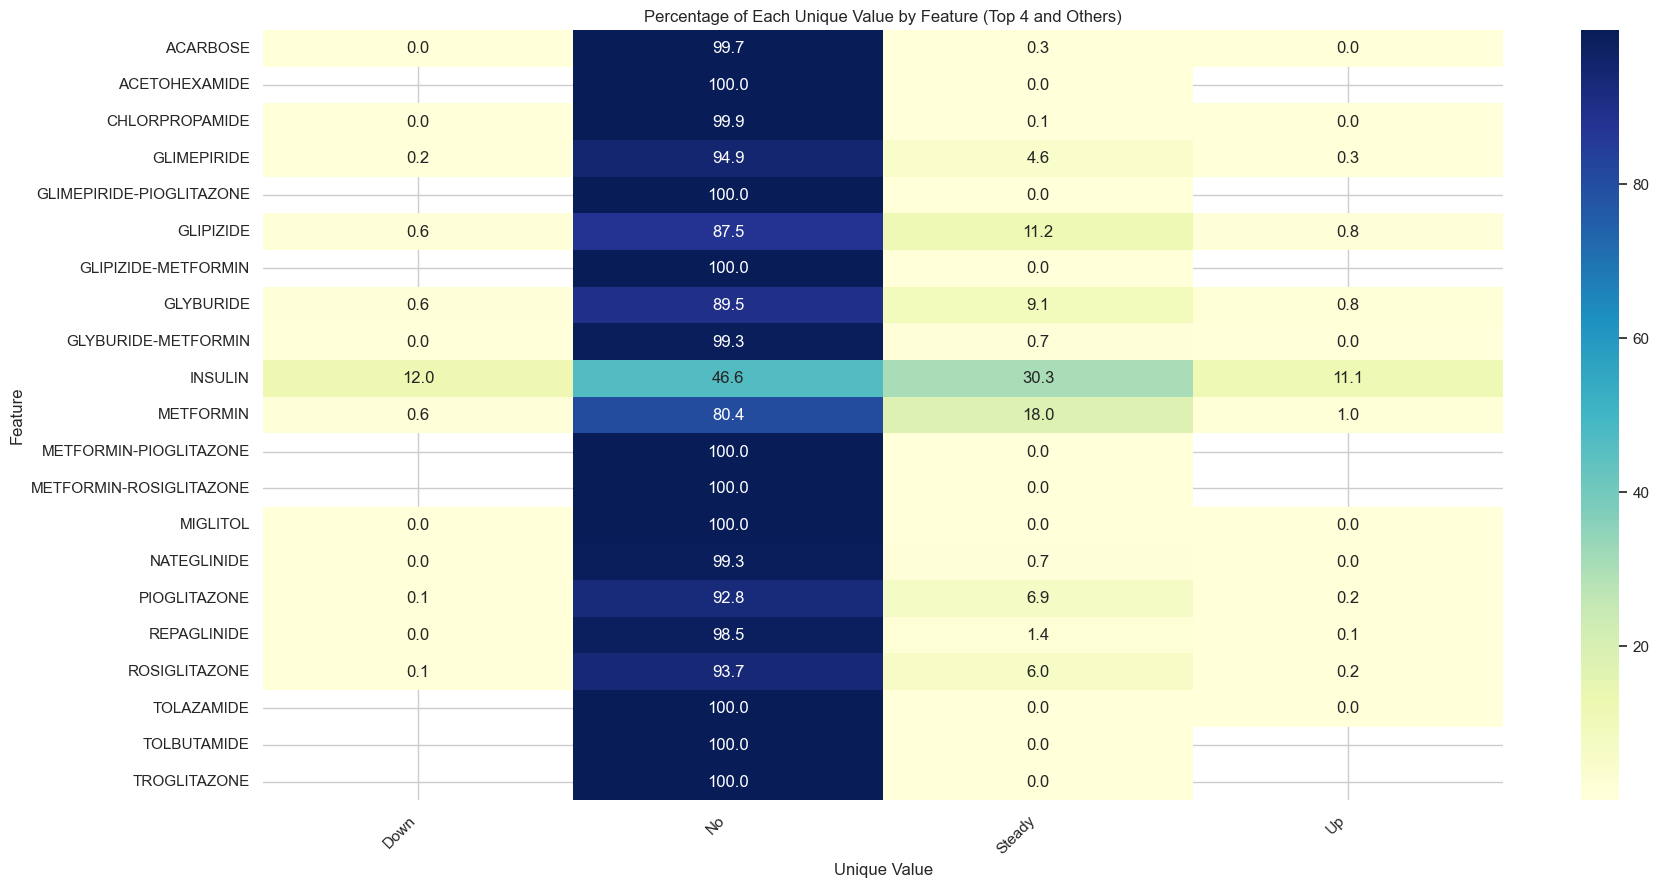

In [301]:
# Distribution of top Categories in categorical features

# Initialize an empty DataFrame to store the heatmap data
heatmap_data = pd.DataFrame()

for col in medications:
    value_counts = df[col].value_counts()
    if len(value_counts) > 5:  # If more than 5 unique values
        # Take top 4 and create a Series for 'Other'
        top_values = value_counts.iloc[:4]
        other_sum = pd.Series(
            [value_counts.iloc[4:].sum()], index=["Other"]
        )  # Corrected to ensure 'Other' is a Series

        # Combine top values with 'Other' using concat
        new_values = pd.concat([top_values, other_sum])
        percentages = new_values / len(df) * 100
    else:
        percentages = value_counts / len(df) * 100

    # Create a temporary DataFrame to store the data for the current column
    temp_df = pd.DataFrame(
        {
            "Feature": col,
            "Unique Value": percentages.index,
            "Percentage": percentages.values,
        }
    )

    # Append the temporary DataFrame to the main heatmap_data DataFrame
    heatmap_data = pd.concat([heatmap_data, temp_df], ignore_index=True)

# Pivot the DataFrame to get a matrix suitable for a heatmap
pivot_table = heatmap_data.pivot(
    index="Feature", columns="Unique Value", values="Percentage"
)  # Corrected pivot call

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Percentage of Each Unique Value by Feature (Top 4 and Others)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


In [304]:
df["TROGLITAZONE"].nunique()  # Rem


2

In [313]:
# Removing outliers and deleting the
medications_todelete = [
    "TROGLITAZONE",
    "TOLBUTAMIDE",
    "TOLAZAMIDE",
    "METFORMIN-ROSIGLITAZONE",
    "METFORMIN-PIOGLITAZONE",
    "GLIPIZIDE-METFORMIN",
    "GLIMEPIRIDE-PIOGLITAZONE",
    "ACETOHEXAMIDE",
]


# Step 1: Identify patients to remove
patients_to_remove = set()
for column in medications_todelete:
    # Add patients who have medication not marked as 'No' to the set
    patients_to_remove.update(df[df[column] != "No"]["PATIENT_NBR"].unique())

# Step 2: Remove all rows associated with these patients
df = df[~df["PATIENT_NBR"].isin(patients_to_remove)]


In [300]:
cat_nonmed = [col for col in cat_cols if col not in medications]
print(cat_nonmed)


['RACE', 'GENDER', 'AGE', 'CHANGE', 'DIABETESMED', 'READMITTED', 'ADMISSION_TYPE_ID', 'NUM_PROCEDURES']


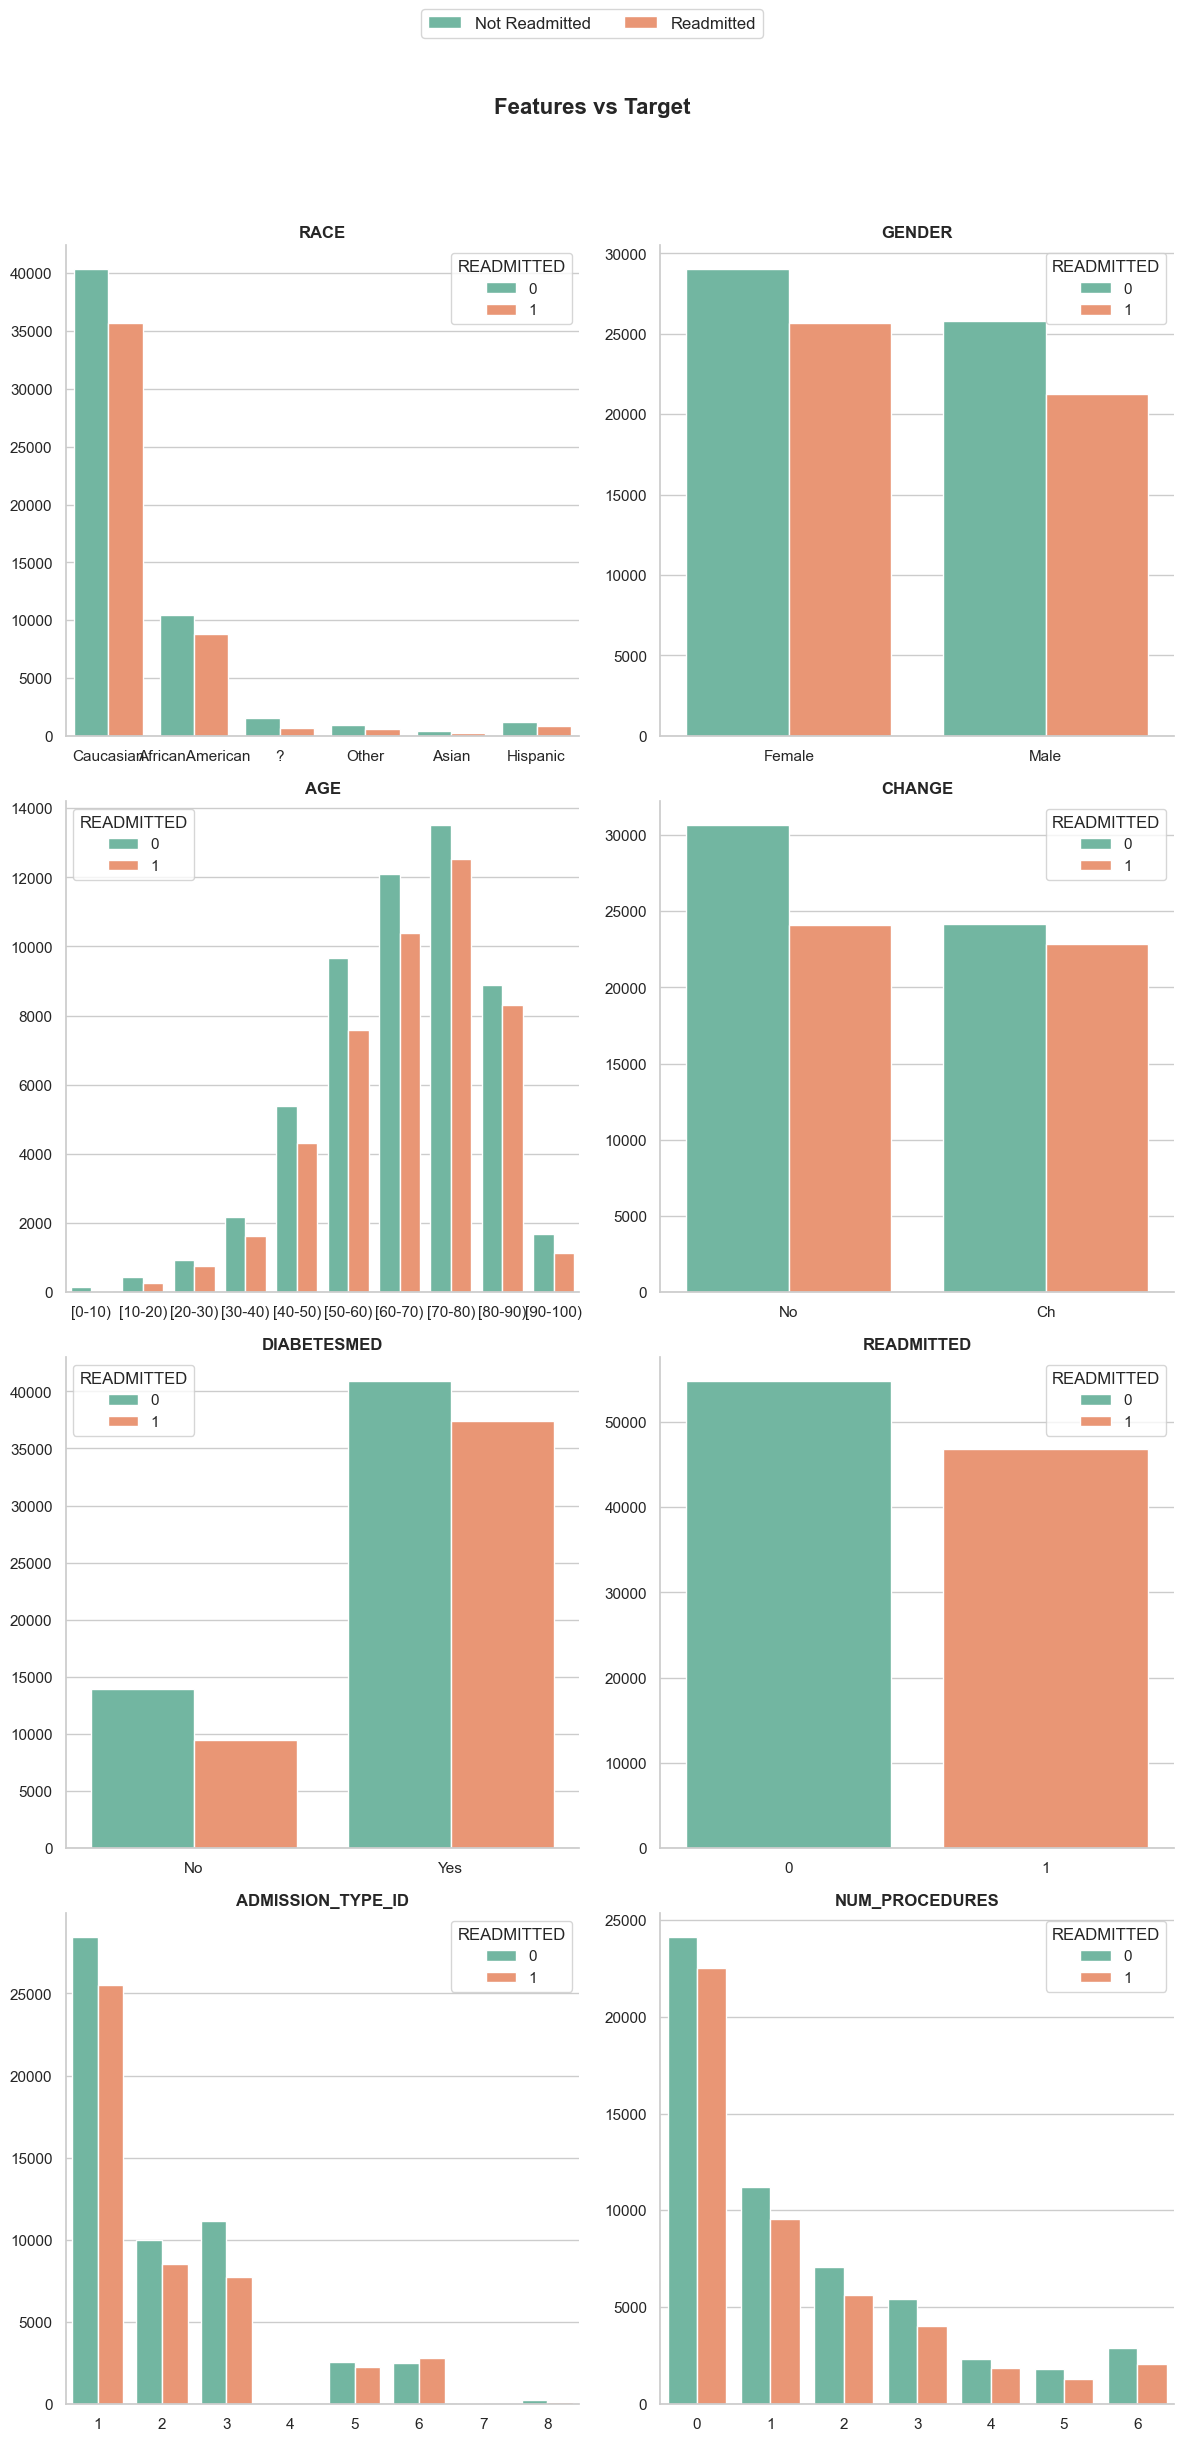

In [305]:
# Categorical features hued per readmissions

# Determine the size and layout of the subplots
figsize = (12, len(cat_nonmed) * 3)  # Adjusted for better visualization
n_cols = 2  # Number of columns in the subplot grid
n_rows = len(cat_nonmed) // n_cols + (
    len(cat_nonmed) % n_cols > 0
)  # Add an extra row if there's an odd number of 'cat_cols'

fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

for idx, cat_col in enumerate(cat_nonmed):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = (
        axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    )  # Adjust for when there's only one row
    sns.countplot(data=df, hue="READMITTED", x=cat_col, palette="Set2", ax=ax)

    # Improve subplot aesthetics
    ax.set_ylabel("")
    ax.spines["top"].set_visible(False)
    ax.set_xlabel("")
    ax.spines["right"].set_visible(False)
    ax.set_title(f"{cat_col}", loc="center", weight="bold", fontsize=12)

# Hide any unused subplots
if len(cat_nonmed) % n_cols != 0:
    for idx in range(len(cat_nonmed), n_rows * n_cols):
        fig.delaxes(axes.flatten()[idx])

# Adjust the layout and add a title
fig.suptitle("Features vs Target", ha="center", fontweight="bold", fontsize=16)

# Add a legend outside the last subplot
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles,
    ["Not Readmitted", "Readmitted"],
    loc="upper center",
    bbox_to_anchor=(0.5, 1.02),
    ncol=2,
    fontsize=12,
)

plt.tight_layout(
    rect=[0, 0, 1, 0.95]
)  # Adjust the rect parameter to make space for the title and legend
plt.show()


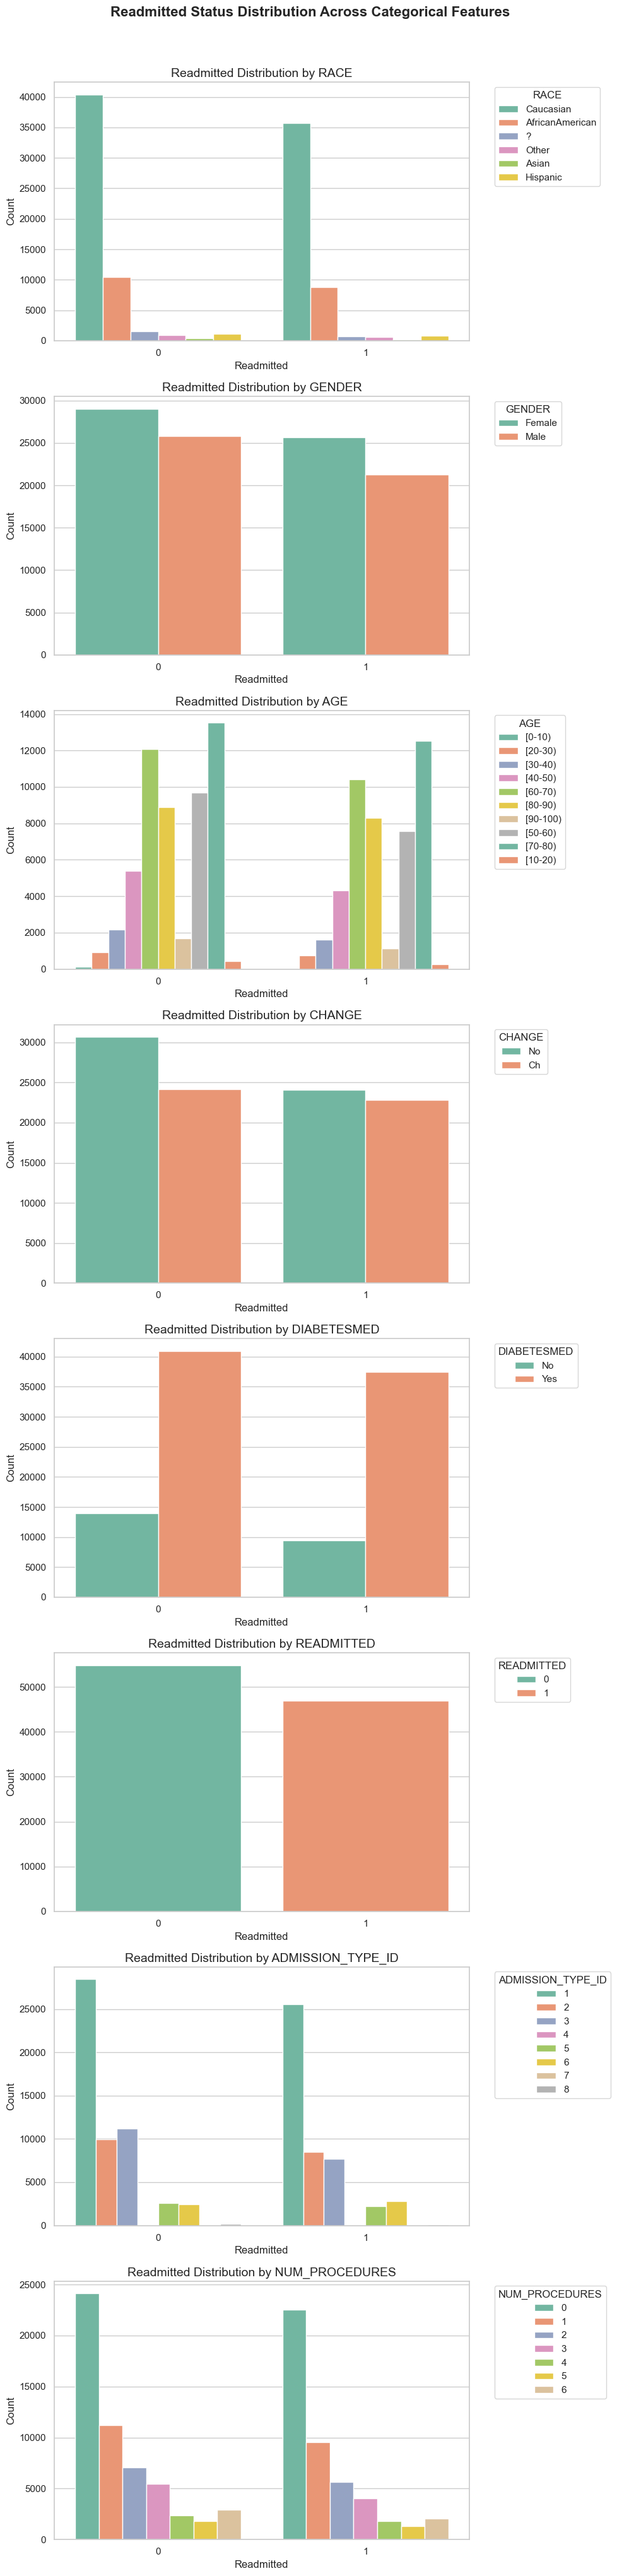

In [306]:
# Readmissions hued per categorical features

# Layout Setup
sns.set(style="whitegrid")
num_features = len(cat_nonmed)
figsize = (
    10,
    5 * num_features,
)  # Height is scaled by the number of features for clarity

# Create a figure to hold the subplots
fig = plt.figure(figsize=figsize)

# Iterate over each categorical feature to create a subplot
for idx, cat_col in enumerate(cat_nonmed):
    ax = fig.add_subplot(num_features, 1, idx + 1)
    sns.countplot(data=df, x="READMITTED", hue=cat_col, palette="Set2", ax=ax)

    # Improve subplot aesthetics
    ax.set_ylabel("Count")
    ax.set_xlabel("Readmitted")
    ax.set_title(f"Readmitted Distribution by {cat_col}", fontsize=14)
    ax.legend(title=cat_col, bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to prevent overlap
plt.tight_layout()

# Add a main title
fig.suptitle(
    "Readmitted Status Distribution Across Categorical Features",
    fontsize=16,
    fontweight="bold",
    y=1.02,
)

plt.show()


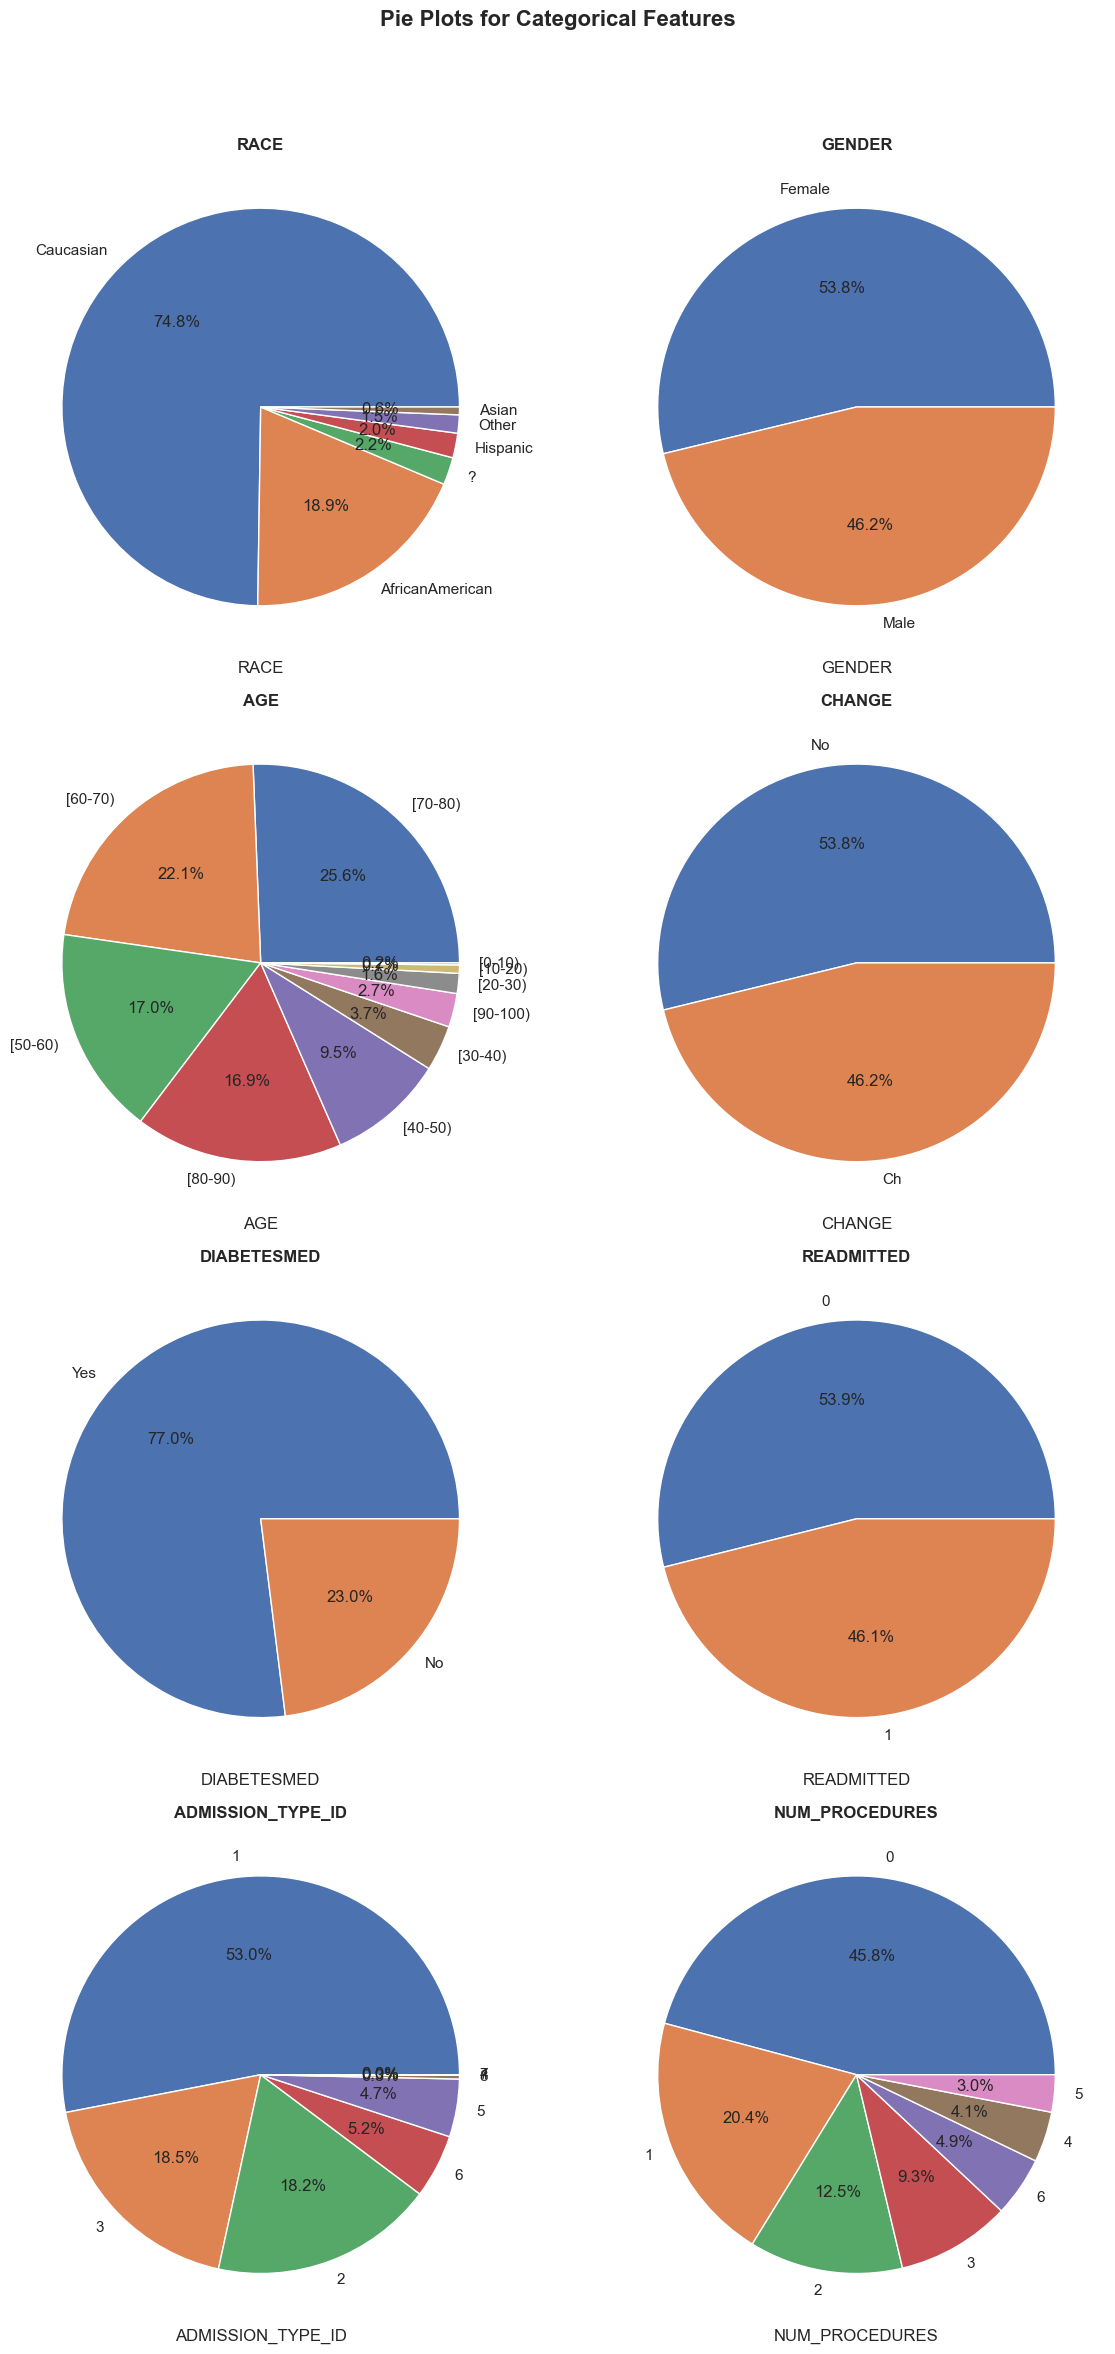

In [314]:
# Determine the size and layout of the subplots
figsize = (12, len(cat_nonmed) * 3)  # Adjusted for better visualization
n_cols = 2  # Number of columns in the subplot grid
n_rows = len(cat_nonmed) // n_cols + (
    len(cat_nonmed) % n_cols > 0
)  # Add an extra row if there's an odd number of 'cat_nonmed'

fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

for idx, cat_col in enumerate(cat_nonmed):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = (
        axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    )  # Adjust for when there's only one row
    df[cat_col].value_counts().plot.pie(ax=ax, autopct="%.1f%%")

    # Improve subplot aesthetics
    ax.set_ylabel("")
    ax.set_xlabel(cat_col)
    ax.set_title(f"{cat_col}", loc="center", weight="bold", fontsize=12)

# Hide any unused subplots
if len(cat_nonmed) % n_cols != 0:
    for idx in range(len(cat_nonmed), n_rows * n_cols):
        fig.delaxes(axes.flatten()[idx])

# Adjust the layout and add a title
fig.suptitle(
    "Pie Plots for Categorical Features", ha="center", fontweight="bold", fontsize=16
)

plt.tight_layout(
    rect=[0, 0, 1, 0.95]
)  # Adjust the rect parameter to make space for the title

plt.show()


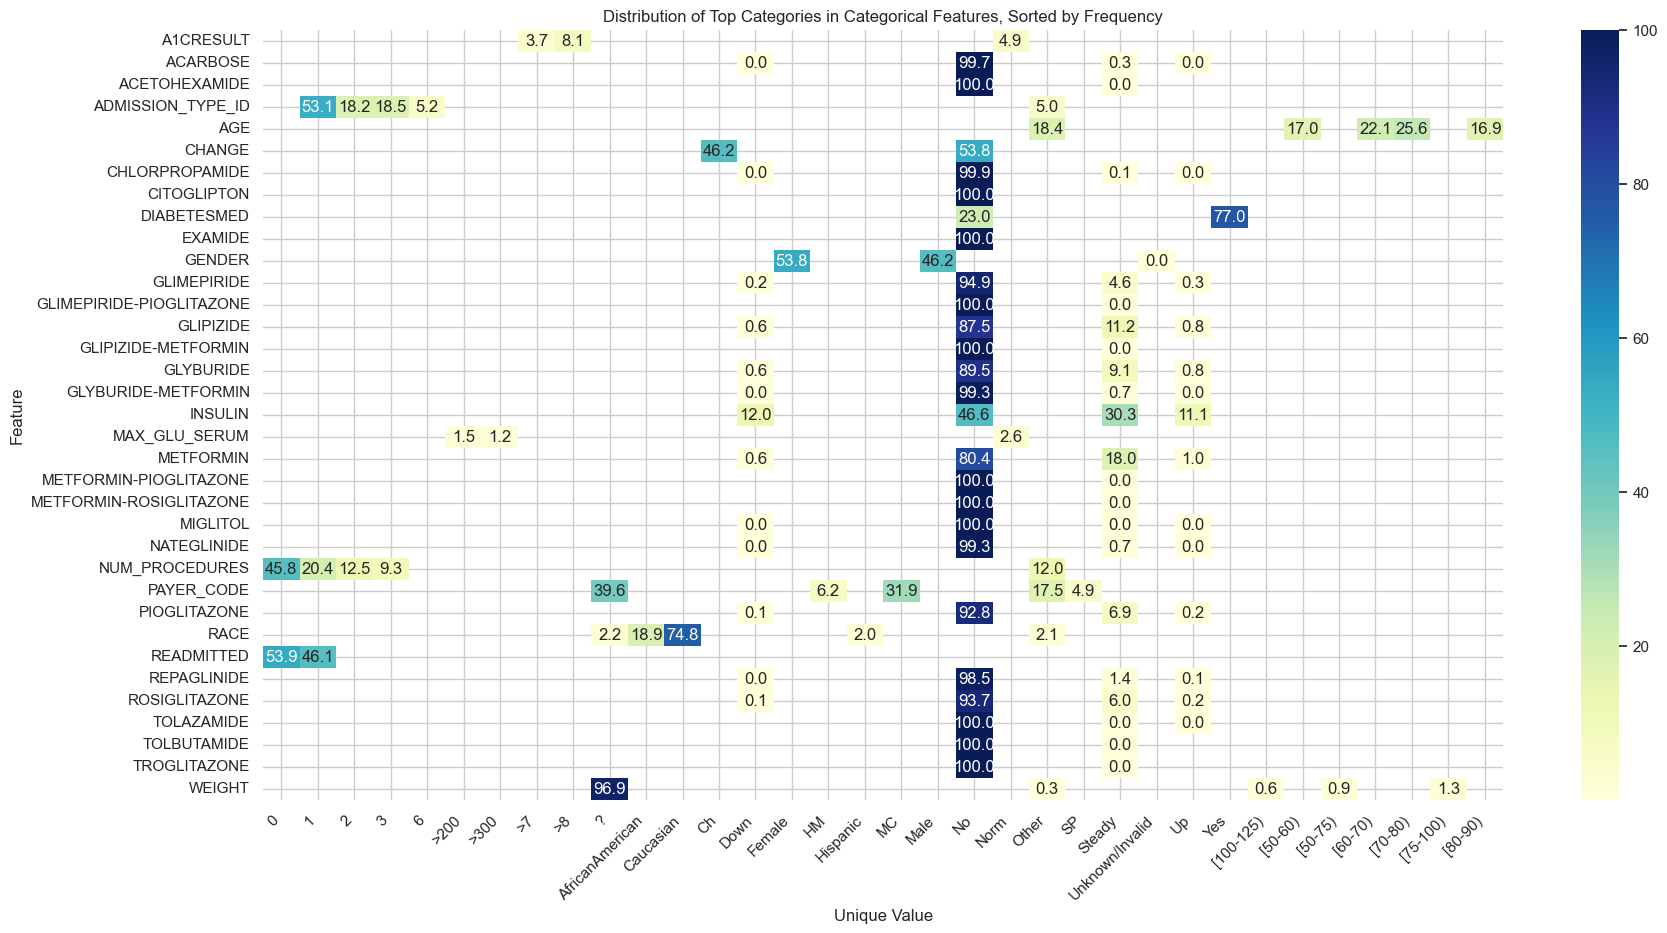

In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'cat_cols' is your list of categorical columns

# Initialize an empty DataFrame to store the heatmap data
heatmap_data = pd.DataFrame()

for col in cat_cols:
    # Sort the unique values by count within the feature
    value_counts = df[col].value_counts().sort_values(ascending=False)
    if len(value_counts) > 5:  # If more than 5 unique values
        # Take top 4 and create a Series for 'Other'
        top_values = value_counts.iloc[:4]
        other_sum = pd.Series(
            [value_counts.iloc[4:].sum()], index=["Other"]
        )  # Corrected to ensure 'Other' is a Series

        # Combine top values with 'Other' using concat
        new_values = pd.concat([top_values, other_sum])
        percentages = new_values / len(df) * 100
    else:
        percentages = value_counts / len(df) * 100

    # Create a temporary DataFrame to store the data for the current column
    temp_df = pd.DataFrame(
        {
            "Feature": col,
            "Unique Value": percentages.index,
            "Percentage": percentages.values,
        }
    )

    # Append the temporary DataFrame to the main heatmap_data DataFrame
    heatmap_data = pd.concat([heatmap_data, temp_df], ignore_index=True)

# Pivot the DataFrame to get a matrix suitable for a heatmap
pivot_table = heatmap_data.pivot(
    index="Feature", columns="Unique Value", values="Percentage"
)  # Corrected pivot call

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Distribution of Top Categories in Categorical Features, Sorted by Frequency")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


### 3. Categorical numerically-encoded


In [250]:
df[cat_but_car]


MEDICAL_SPECIALTY  DIAG_1  DIAG_2 DIAG_3
0       Pediatrics-Endocrinology  250.83       ?      ?
1                              ?     276  250.01    255
2                              ?     648     250    V27
3                              ?       8  250.43    403
4                              ?     197     157    250
...                          ...     ...     ...    ...
101761                         ?  250.13     291    458
101762                         ?     560     276    787
101763                         ?      38     590    296
101764           Surgery-General     996     285    998
101765                         ?     530     530    787

[101766 rows x 4 columns]

### 4. Numerical categorically encoded


##  Task 2: Data assembling and initial pre-processing (15%)


In [ ]:
print(df.columns)


In [ ]:
print(df["DIAG_3"].unique())


In [ ]:
label_encoding = [
    "AGE",  # Ordinal
    "DIABETESMED",  # Binary
    "GENDER",  # Binary
    "METFORMIN",  # Ordinal
    "INSULIN",  # Ordinal
    "CHANGE",
]  # Binary


In [ ]:
onehot_encoding = [
    "MEDICAL_SPECIALITY",
    "DIAG_1" "DIAG_2",
    "DIAG_3",
    "RACE",  # Non-ordinal categorical feature
    "PAYER_CODE",
]  # Non-ordinal categorical feature


In [ ]:
dropping_features = [
    "MAX_GLU_SERUM",
    "PATIENT_NBR",
    "METFORMIN-ROSIGLITAZONE" "TOLBUTAMIDE",
]
